In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, quarter_plot, month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

In [18]:
path = "/home/mano/Manoj/Learning/time_series/data/time-series-analysis/Time Series Analysis/Introduction to Time Series Forecasting/choco_monthly_revenue.csv"

In [27]:
df = pd.read_csv(path, index_col="Month with Year", parse_dates=True)
df.head(15)

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461
2018-06-01,1491
2018-07-01,1376
2018-08-01,1209
2018-09-01,1668


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [21]:
df.isnull().sum()

revenue    0
dtype: int64

In [22]:
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [28]:
df = df.asfreq('MS')
df.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [29]:
df.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


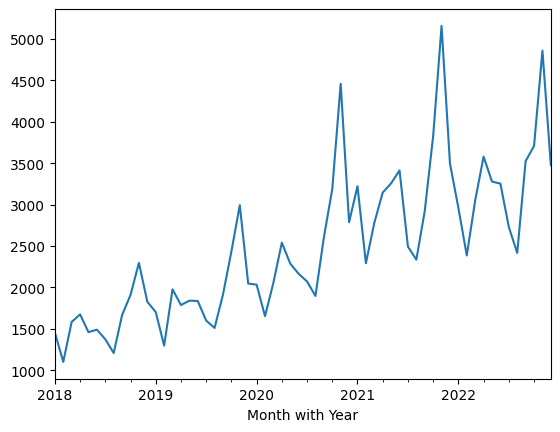

In [30]:
df['revenue'].plot()
plt.show()

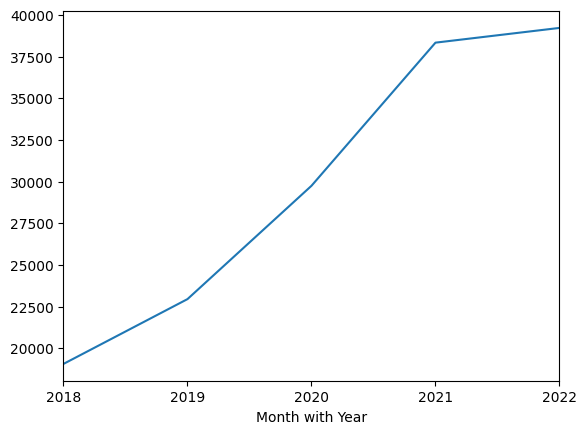

In [31]:
df.resample("YE").sum()['revenue'].plot()
plt.show()

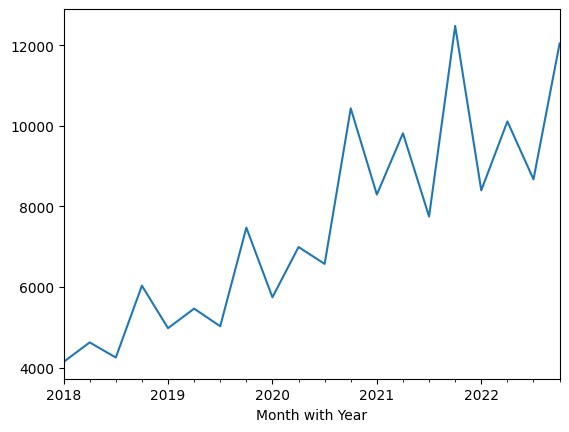

In [32]:
df.resample('QE').sum()['revenue'].plot()
plt.show()

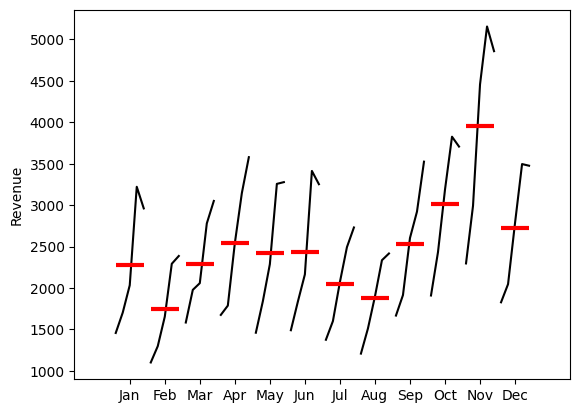

In [33]:
month_plot(df['revenue'].resample('ME').mean(), ylabel="Revenue")
plt.show()

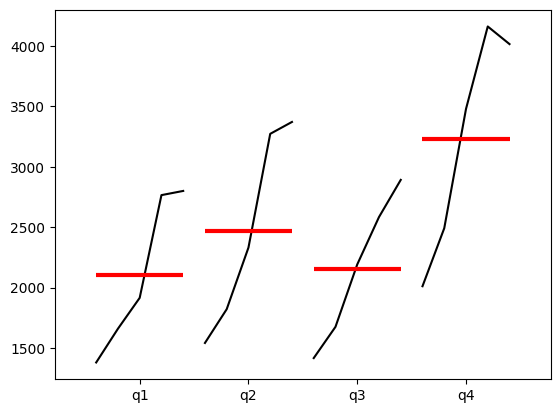

In [34]:
quarter_plot(df['revenue'].resample('QE').mean())
plt.show()

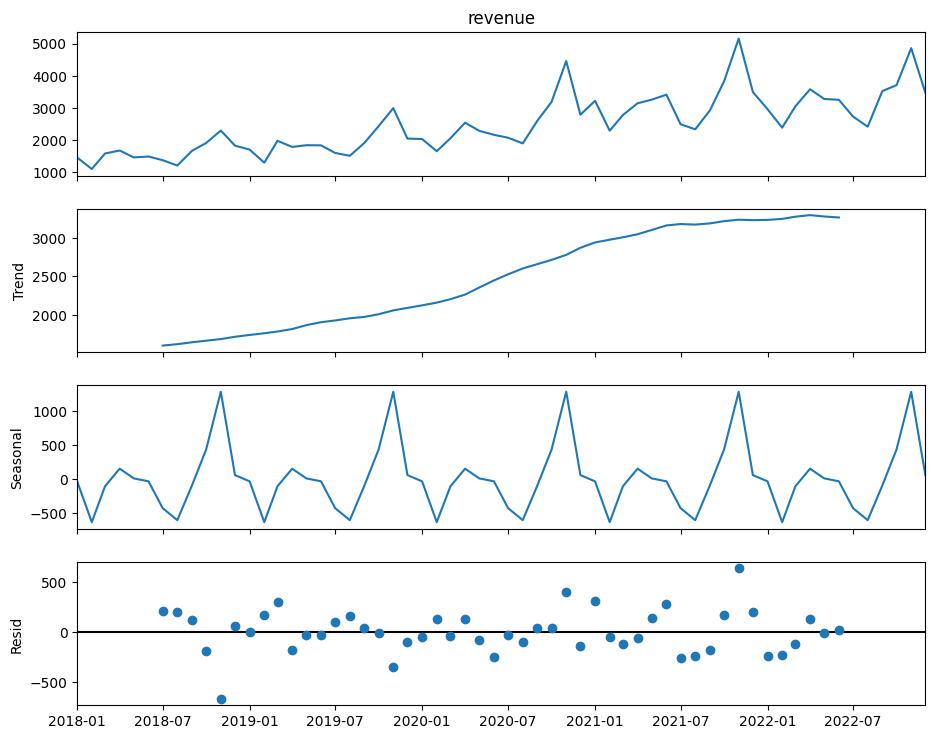

In [46]:
decomposition = seasonal_decompose(df['revenue'], model='add', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

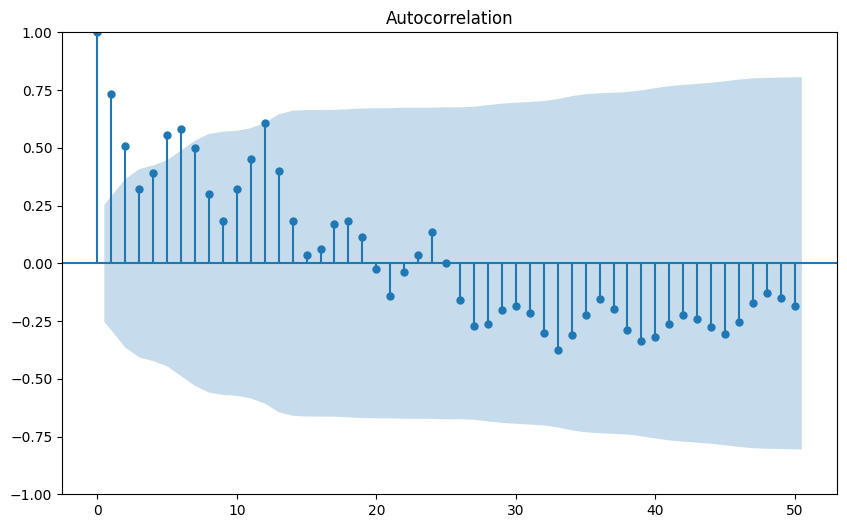

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(df['revenue'], lags=50, ax=ax)
plt.show()

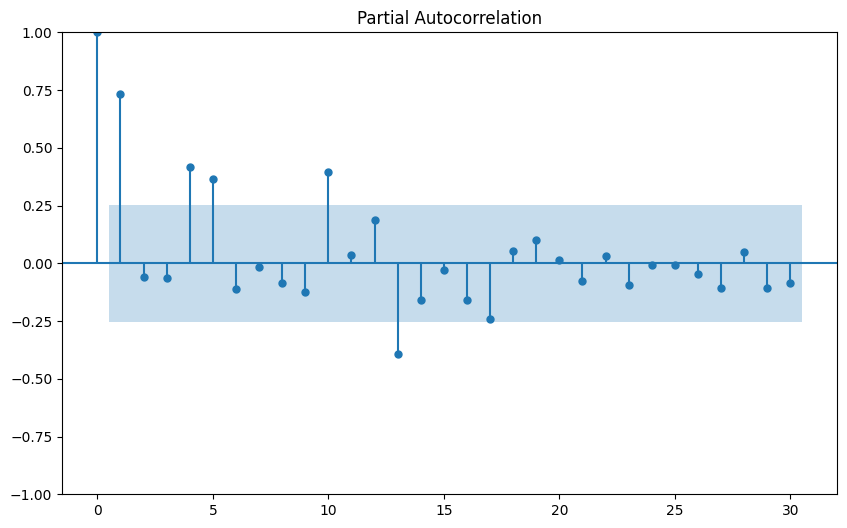

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['revenue'], lags=30, ax=ax)
plt.show()

In [40]:
periods = 10
train, test = df.iloc[:-periods, 0], df.iloc[-periods:, 0]
test.head()

Month with Year
2022-03-01    3051
2022-04-01    3579
2022-05-01    3278
2022-06-01    3253
2022-07-01    2731
Freq: MS, Name: revenue, dtype: int64

In [41]:
def model_assessment(train, test, prediction, title):
    plt.figure(figsize=(10, 4))
    plt.plot(train, label="Train")
    plt.plot(test, label="Test")
    plt.plot(prediction, label="Forecast")
    plt.legend()
    plt.title(f'Train, test and forecast for {title}')
    

    plt.show()

    mae = mean_absolute_error(test, prediction)
    rmse = root_mean_squared_error(test, prediction)
    mape = mean_absolute_percentage_error(test, prediction)

    print(f"MAE : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAPE: {100 * mape:.2f}")


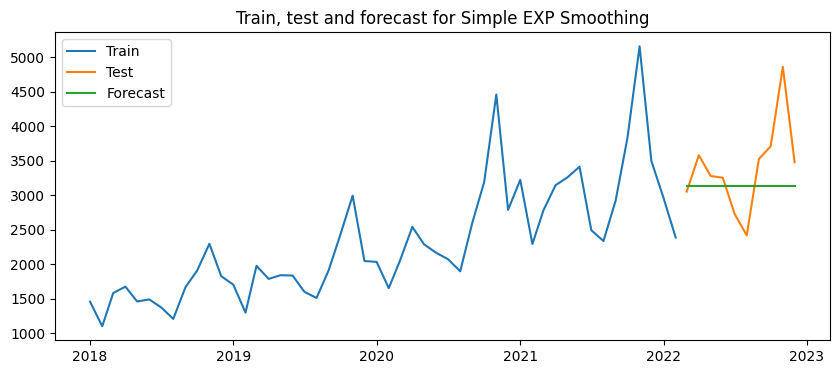

MAE : 492.82
RMSE : 668.62
MAPE: 13.92


In [42]:
model_simple = SimpleExpSmoothing(train).fit()
prediction_simple = model_simple.forecast(len(test))
model_assessment(train, test, prediction_simple, "Simple EXP Smoothing")

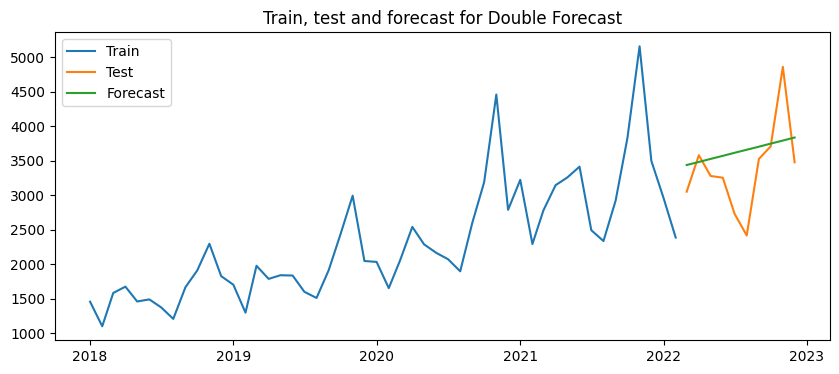

MAE : 481.46
RMSE : 627.72
MAPE: 15.47


In [43]:
model_double = ExponentialSmoothing(train, trend="add", seasonal=None).fit()
prediction_double = model_double.forecast(len(test))
model_assessment(train, test, prediction_double, "Double Forecast")

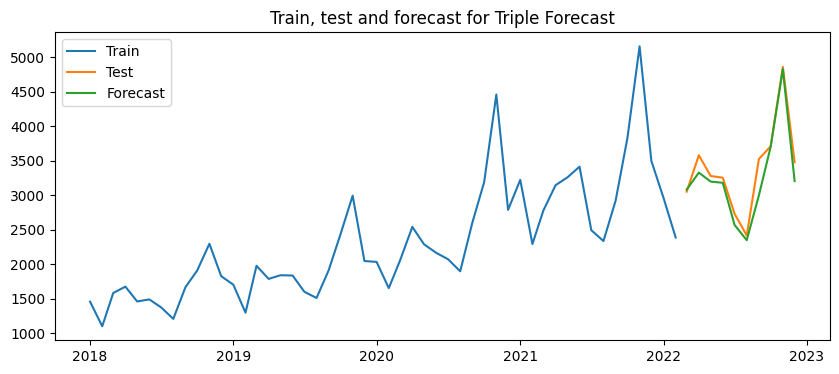

MAE : 150.43
RMSE : 214.77
MAPE: 4.51


In [44]:
model_triple = ExponentialSmoothing(train, trend="add", seasonal="mul", seasonal_periods=12).fit()
prediction_triple = model_triple.forecast(len(test))
model_assessment(train, test, prediction_triple, "Triple Forecast")

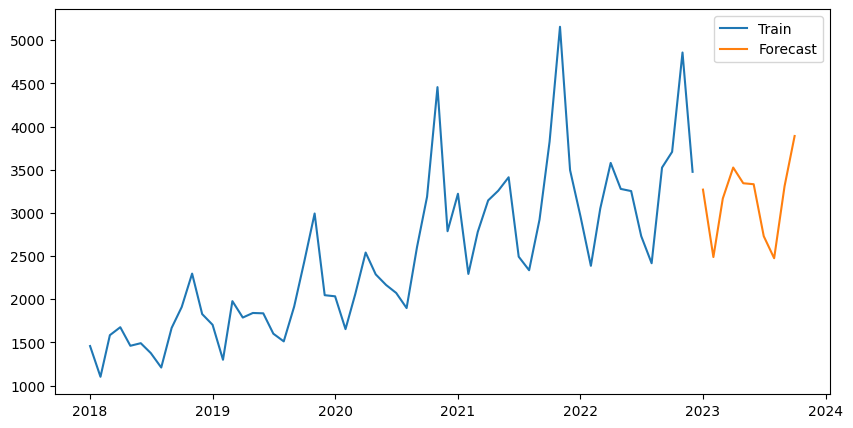

In [45]:
model = ExponentialSmoothing(df.revenue, trend="add", seasonal="mul", seasonal_periods=12).fit()
forecast = model.forecast(10)
plt.figure(figsize=(10, 5))
plt.plot(df.revenue, label="Train")
plt.plot(forecast, label="Forecast")
plt.legend()
plt.show()